In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import scipy.io
from scipy.stats import pearsonr
import os
from utils import concatenate_timeseries, calculate_fc_matrix
import torch


# Different concatenate trial

In [ ]:
def concatenate_aux(ts_path):
    
    # Iterate through each folder in the main folder
    for subject_folder in os.listdir(ts_path):
        subject_folder_path = os.path.join(ts_path, subject_folder)
        
        # Check if the current path is indeed a folder
        if os.path.isdir(subject_folder_path):
            # This list will hold the .mat file contents for the current subject
            ts_list = []
            
            # Iterate through each file in the subject's folder
            for file_name in os.listdir(subject_folder_path):
                if file_name.endswith('.mat'):
                    file_path = os.path.join(subject_folder_path, file_name)
                    
                    # Load the .mat file and append its contents to the subject_data list
                    time_series = scipy.io.loadmat(file_path)
                    
                    ts_list.append(time_series['dtseries'])
        
            concatenated = concatenate_timeseries(ts_list)
        
            fc = calculate_fc_matrix(concatenated, kind = 'correlation', corr_kind = 'correlation', subject = subject_folder, 
                                     corr_path = '/home/personal/Documents/2023_2/tesis/data_processing/data_trial/corr_matrices/')
            
ts_path = '/home/personal/Documents/2023_2/tesis/data_processing/data_trial/time_series'
concatenate_aux(ts_path)

# Time Series

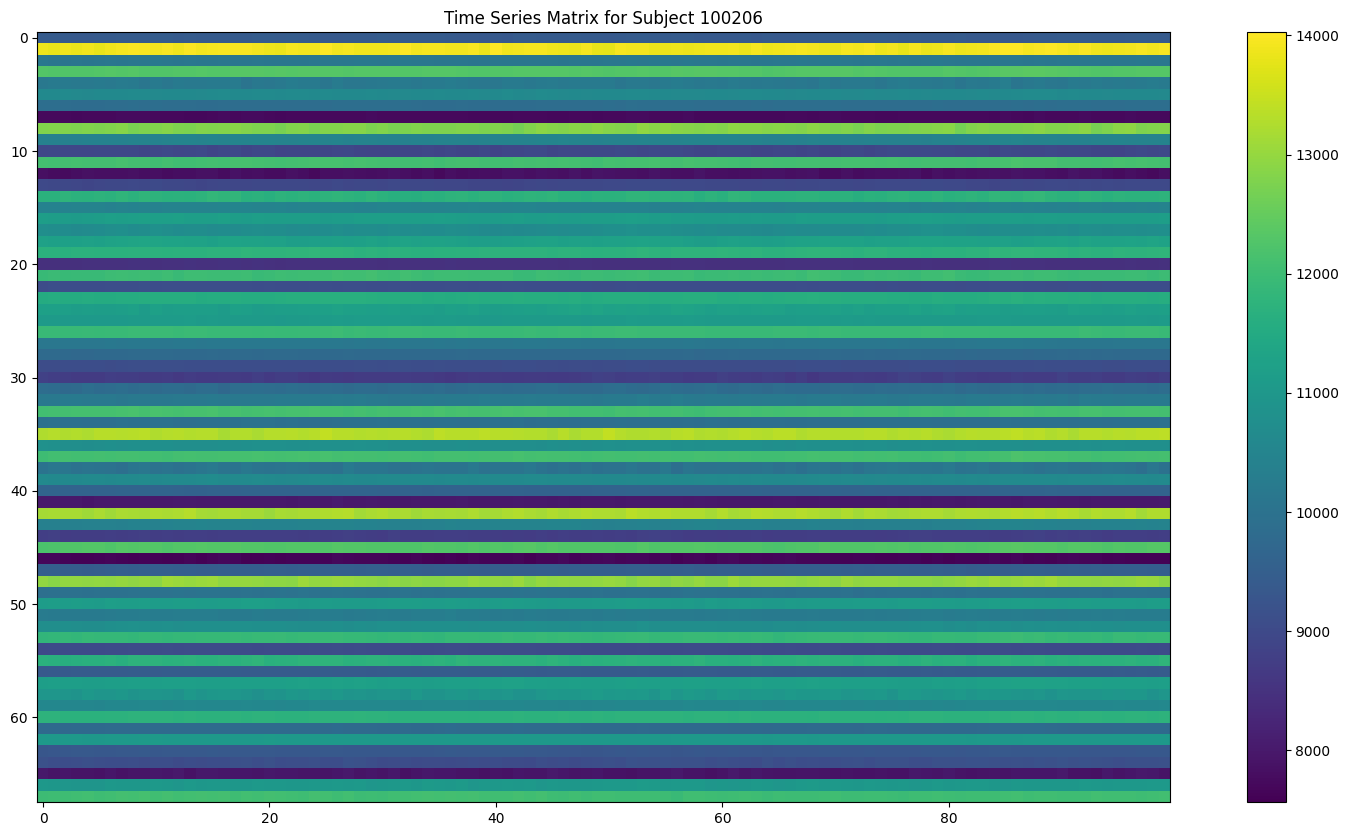

Visualized SCS matrix for subject ID: 100206


In [30]:
def visualize_subject_time_series(mat_file_path, subject_id):
    # Load the .mat file
    data = scipy.io.loadmat(mat_file_path)

    # Extract the subject list and 'ts' matrix
    ts_matrix = data['dtseries'][:68, :100]

    # Plotting
    plt.figure(figsize=(20, 10))
    plt.imshow(ts_matrix, cmap='viridis')
    plt.colorbar()
    plt.title(f"Time Series Matrix for Subject {subject_id}")
    plt.show()


# Usage example
mat_file_path = '/home/personal/Documents/2023_2/tesis/data_processing_alt/data/brain_data/time_series/100206/100206.mat'  
subject_id = '100206'
visualize_subject_time_series(mat_file_path, subject_id)
print("Visualized SCS matrix for subject ID:", subject_id)

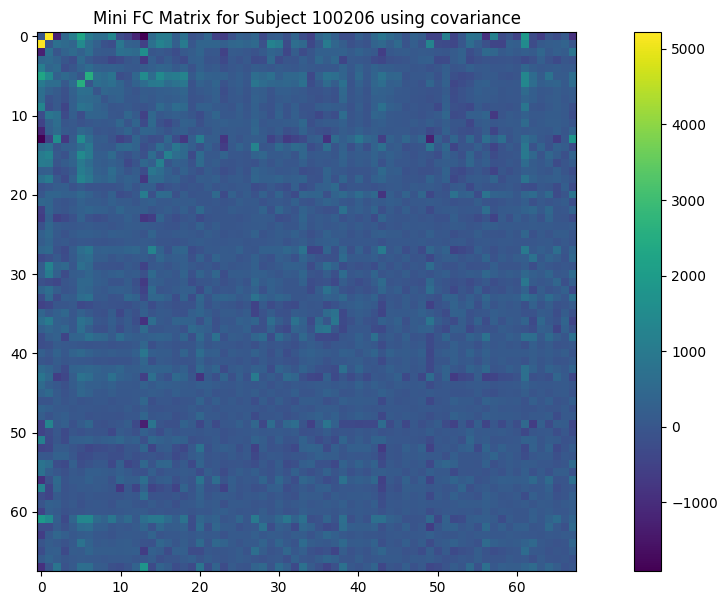

Visualized SCS matrix for subject ID: 100206


In [19]:
def calculate_fc_matrix(data, kind):
    """Calculate the correlation matrix from the timeseries data."""
    num_nodes = data.shape[0]
    fc_matrix = np.zeros((num_nodes, num_nodes))
    for i in range(num_nodes):
        for j in range(i, num_nodes):
            if i == j:
                fc_matrix[i, j] = 1.0
            else:
                if kind == 'correlation':
                    correlation, _ = pearsonr(data[i], data[j])
                    fc_matrix[i, j] = fc_matrix[j, i] = correlation
                    
                elif kind == 'covariance':
                    covariance_matrix = np.cov(data[i], data[j])
                    covariance = covariance_matrix[0, 1]  # This is the covariance between data[i] and data[j]
                    fc_matrix[i, j] = fc_matrix[j, i] = covariance
                
    return fc_matrix

def visualize_subject_correlations(mat_file_path, subject_id, kind = 'covariance'):
    # Load the .mat file
    data = scipy.io.loadmat(mat_file_path)

    # Extract the subject list and 'ts' matrix
    ts_matrix = data['dtseries'][:68, :100]
    
    fc_matrix = calculate_fc_matrix(ts_matrix, kind = kind)
    
    # Plotting
    plt.figure(figsize=(15, 7))
    plt.imshow(fc_matrix, cmap='viridis')
    plt.colorbar()
    plt.title(f"Mini FC Matrix for Subject {subject_id} using {kind}")
    plt.show()


# Usage example
mat_file_path = '/home/personal/Documents/2023_2/tesis/GNN-BAA/data_processing/data/time_series_REST_2/100206/timeseries_REST2_RL.mat'  
subject_id = '100206'
visualize_subject_correlations(mat_file_path, subject_id, kind = 'covariance')
print("Visualized SCS matrix for subject ID:", subject_id)

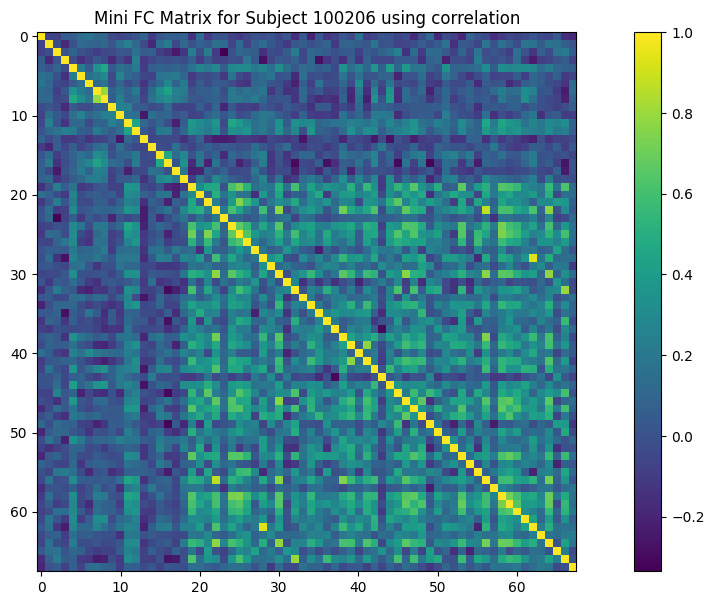

Visualized SCS matrix for subject ID: 100206


In [24]:
# Usage example
mat_file_path = '/home/personal/Documents/2023_2/tesis/GNN-BAA/data_processing/data/time_series_REST_2/100206/timeseries_REST2_LR.mat'  
subject_id = '100206'
visualize_subject_correlations(mat_file_path, subject_id, kind = 'correlation')
print("Visualized SCS matrix for subject ID:", subject_id)

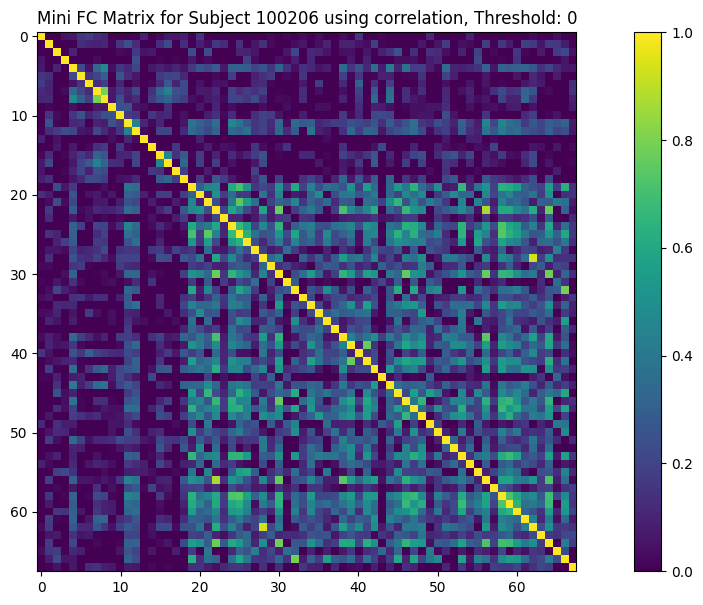

Visualized SCS matrix for subject ID: 100206


In [29]:
def umbralise_fc_matrix(fc_matrix, threshold=0):
    # Set values with absolute value greater than threshold to zero
    umbralised_matrix = np.where(fc_matrix < threshold, 0, fc_matrix)
    return umbralised_matrix

def visualize_subject_correlations_umb(mat_file_path, subject_id, kind='covariance', threshold=0):
    # Load the .mat file
    data = scipy.io.loadmat(mat_file_path)

    # Extract the subject list and 'ts' matrix
    ts_matrix = data['dtseries'][:68, :100]
    
    # Calculate the FC matrix
    fc_matrix = calculate_fc_matrix(ts_matrix, kind=kind)
    
    # Umbralise the FC matrix
    umbralised_fc_matrix = umbralise_fc_matrix(fc_matrix, threshold=threshold)
    
    # Plotting
    plt.figure(figsize=(15, 7))
    plt.imshow(umbralised_fc_matrix, cmap='viridis')
    plt.colorbar()
    plt.title(f"Mini FC Matrix for Subject {subject_id} using {kind}, Threshold: {threshold}")
    plt.show()
    
# Usage example
mat_file_path = '/home/personal/Documents/2023_2/tesis/GNN-BAA/data_processing/data/time_series_REST_2/100206/timeseries_REST2_LR.mat'  
subject_id = '100206'
visualize_subject_correlations_umb(mat_file_path, subject_id, kind = 'correlation')
print("Visualized SCS matrix for subject ID:", subject_id)

# The structural matrices

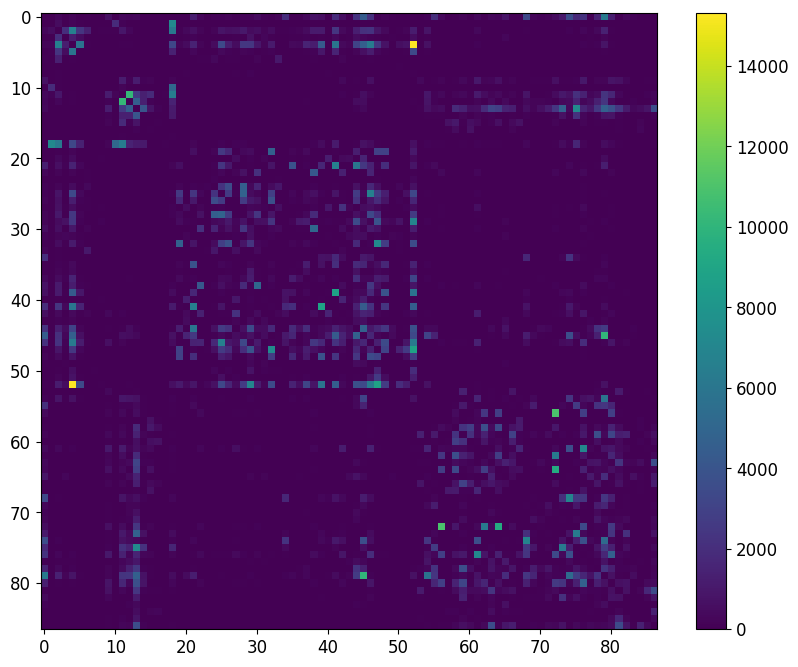

Visualized SCS matrix for subject ID: 100206


In [10]:
def visualize_subject_scs(mat_file_path, subject_index):
    # Load the .mat file
    data = scipy.io.loadmat(mat_file_path)

    # Extract the subject list and 'scs' matrix
    subject_list = data['subject_list']
    scs_matrix = data['scs']

    # Get the subject ID from the subject list
    subject_id = subject_list[subject_index, 0]

    # Get the corresponding 'scs' matrix for the subject
    subject_scs = scs_matrix[:, :, subject_index]
    
    subject_scs = subject_scs + subject_scs.T - np.diag(np.diag(subject_scs))

    
    
    # Plotting
    plt.figure(figsize=(10, 8))
    plt.imshow(subject_scs, cmap='viridis')
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=12)
    # plt.title(f"Matriz estructural para el sujeto {subject_id}")
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.show()

    return subject_id

# Usage example
mat_file_path = '/home/personal/Documents/2023_2/tesis/GNN-BAA/data_processing/data/original_data/scs_desikan.mat'  # Replace with the path to your .mat file
subject_index = 0  # Replace with the desired index
subject_id = visualize_subject_scs(mat_file_path, subject_index)
print("Visualized SCS matrix for subject ID:", subject_id)

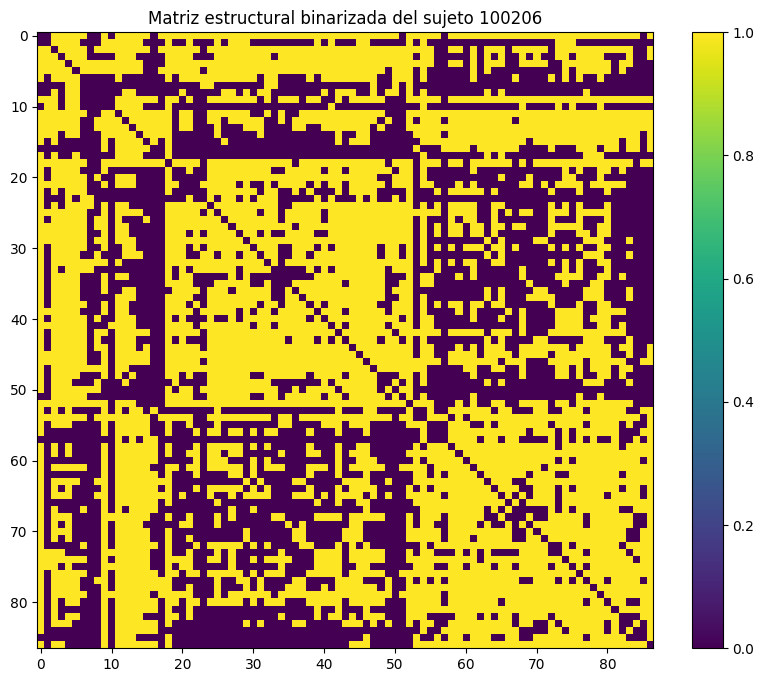

Visualized SCS matrix for subject ID: 100206


In [15]:
def visualize_subject_scs_binarized(mat_file_path, subject_index):
    # Load the .mat file
    data = scipy.io.loadmat(mat_file_path)

    # Extract the subject list and 'scs' matrix
    subject_list = data['subject_list']
    scs_matrix = data['scs']

    # Get the subject ID from the subject list
    subject_id = subject_list[subject_index, 0]

    # Get the corresponding 'scs' matrix for the subject and binarize it
    subject_scs = scs_matrix[:, :, subject_index]
    subject_scs = subject_scs + subject_scs.T - np.diag(np.diag(subject_scs))
    
    subject_scs_binarized = (subject_scs > 0).astype(int)  # Binarize the matrix

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.imshow(subject_scs_binarized, cmap='viridis')
    plt.colorbar()
    plt.title(f"Matriz estructural binarizada del sujeto {subject_id}")
    plt.show()

    return subject_id

subject_id = visualize_subject_scs_binarized(mat_file_path, subject_index)
print("Visualized SCS matrix for subject ID:", subject_id)

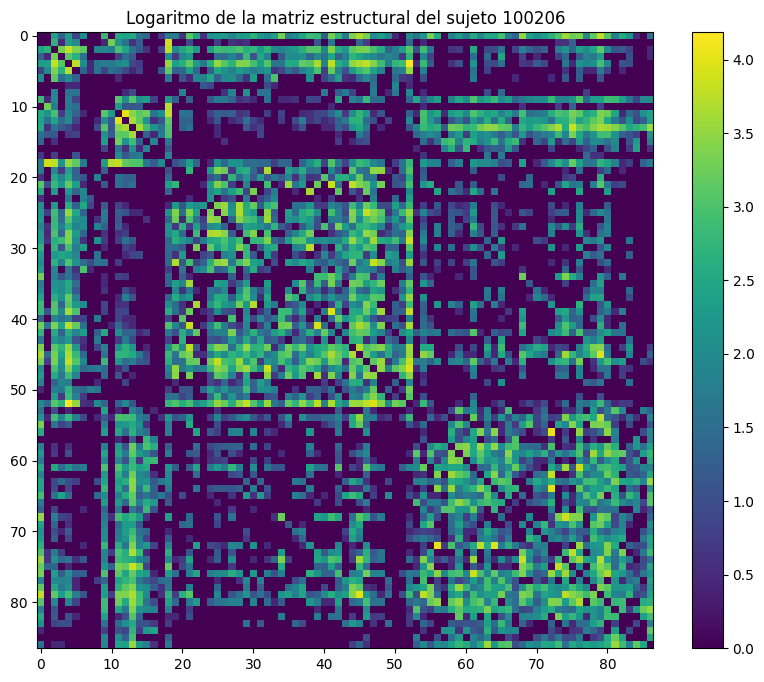

Visualized SCS matrix for subject ID: 100206


In [18]:
def visualize_subject_scs_binarized(mat_file_path, subject_index):
    # Load the .mat file
    data = scipy.io.loadmat(mat_file_path)

    # Extract the subject list and 'scs' matrix
    subject_list = data['subject_list']
    scs_matrix = data['scs']

    # Get the subject ID from the subject list
    subject_id = subject_list[subject_index, 0]

    # Get the corresponding 'scs' matrix for the subject and binarize it
    subject_scs = scs_matrix[:, :, subject_index]
    subject_scs = subject_scs + subject_scs.T - np.diag(np.diag(subject_scs))
    
    subject_scs = np.where(subject_scs <= 0, 1, subject_scs)
    subject_scs = np.log10(subject_scs)
    

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.imshow(subject_scs, cmap='viridis')
    plt.colorbar()
    plt.title(f"Logaritmo de la matriz estructural del sujeto {subject_id}")
    plt.show()

    return subject_id

subject_id = visualize_subject_scs_binarized(mat_file_path, subject_index)
print("Visualized SCS matrix for subject ID:", subject_id)

El valor promedio de los pesos es: 19843.0000
El valor promedio de los pesos es: 67.0000


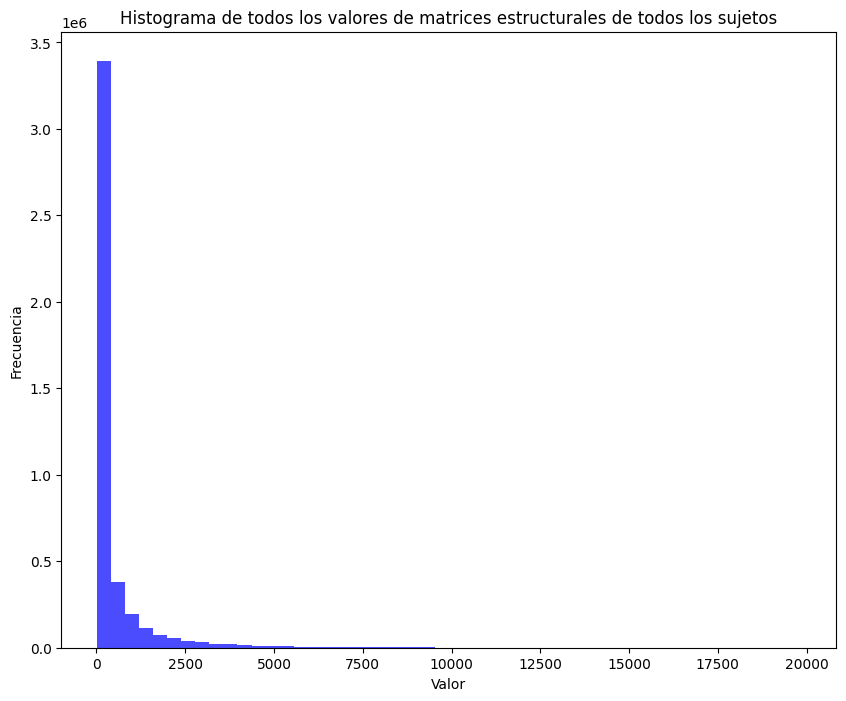

In [14]:
def visualize_all_subjects_histogram(mat_file_path, exclude_zeros=True, apply_log=False):
    # Load the .mat file
    data = scipy.io.loadmat(mat_file_path)

    # Extract the 'scs' matrix
    scs_matrix = data['scs']

    # Initialize a list to store all values from all subjects
    all_values = []

    # Iterate over all subjects
    num_subjects = scs_matrix.shape[2]
    for subject_index in range(num_subjects):
        # Get the corresponding 'scs' matrix for the subject
        subject_scs = scs_matrix[:, :, subject_index]

        # Convert the upper triangular matrix to a full symmetric matrix
        symmetric_scs = subject_scs + subject_scs.T - np.diag(np.diag(subject_scs))

        # Flatten the symmetric matrix and add the values to the list
        all_values.extend(symmetric_scs.flatten())

    # Convert the list to a numpy array for processing
    all_values = np.array(all_values)

    # Exclude zeros if specified
    if exclude_zeros:
        all_values = all_values[all_values != 0]

    # Apply logarithm if specified
    if apply_log:
        # To avoid taking the log of zero or negative numbers, we add a small constant
        all_values = np.log1p(all_values)

    # Calculate the average value
    average_value = np.max(all_values)
    
    print(f"El valor promedio de los pesos es: {average_value:.4f}")
    
    median_value = np.median(all_values)
    
    print(f"El valor promedio de los pesos es: {median_value:.4f}")

    # Plotting histogram
    plt.figure(figsize=(10, 8))
    plt.hist(all_values, bins=50, color='blue', alpha=0.7)
    plt.title("Histograma de todos los valores de matrices estructurales de todos los sujetos")
    plt.xlabel("Valor" + (" (log transformado)" if apply_log else ""))
    plt.ylabel("Frecuencia")
    plt.show()

# Usage example
mat_file_path = '/home/personal/Documents/2023_2/tesis/GNN-BAA/data_processing/data/original_data/scs_desikan.mat'  # Replace with the path to your .mat file
visualize_all_subjects_histogram(mat_file_path, exclude_zeros=True, apply_log=False)


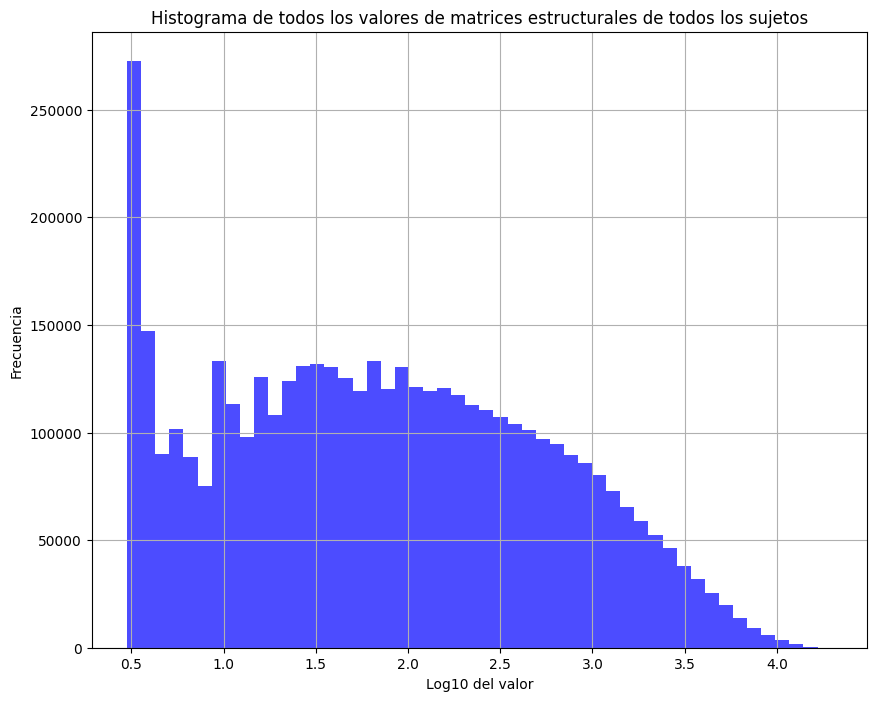

In [4]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

def visualize_all_subjects_histogram(mat_file_path, exclude_zeros=True, apply_log_values=False, apply_log_freq=False):
    # Load the .mat file
    data = scipy.io.loadmat(mat_file_path)

    # Extract the 'scs' matrix
    scs_matrix = data['scs']

    # Initialize a list to store all values from all subjects
    all_values = []

    # Iterate over all subjects
    num_subjects = scs_matrix.shape[2]
    for subject_index in range(num_subjects):
        # Get the corresponding 'scs' matrix for the subject
        subject_scs = scs_matrix[:, :, subject_index]

        # Convert the upper triangular matrix to a full symmetric matrix
        symmetric_scs = subject_scs + subject_scs.T - np.diag(np.diag(subject_scs))

        # Flatten the symmetric matrix and add the values to the list
        all_values.extend(symmetric_scs.flatten())

    # Convert the list to a numpy array for processing
    all_values = np.array(all_values)

    # Exclude zeros if specified
    if exclude_zeros:
        all_values = all_values[all_values != 0]

    # Apply logarithm to values if specified
    if apply_log_values:
        # To avoid taking the log of zero or negative numbers, we filter out non-positive values
        all_values = all_values[all_values > 0]
        all_values = np.log10(all_values)

    # Plotting histogram
    plt.figure(figsize=(10, 8))
    
    # Calculate histogram
    counts, bins, patches = plt.hist(all_values, bins=50, color='blue', alpha=0.7)

    # Apply logarithm to frequencies if specified
    if apply_log_freq:
        # Logarithmic transformation of the frequencies
        counts = np.log10(counts + 1)  # Adding 1 to avoid log(0)
        plt.clf()  # Clear the current figure to plot the transformed histogram
        plt.bar(bins[:-1], counts, width=np.diff(bins), color='blue', alpha=0.7)

    # Set title and labels
    plt.title("Histograma de todos los valores de matrices estructurales de todos los sujetos")
    plt.xlabel("Log10 del valor" if apply_log_values else "Valor")
    plt.ylabel("Log10 de la frecuencia" if apply_log_freq else "Frecuencia")
    plt.grid()
    plt.show()

# Usage example
mat_file_path = '/home/personal/Documents/2023_2/tesis/GNN-BAA/data_processing/data/original_data/scs_desikan.mat'  # Replace with the path to your .mat file
visualize_all_subjects_histogram(mat_file_path, exclude_zeros=True, apply_log_values=True, apply_log_freq=False)


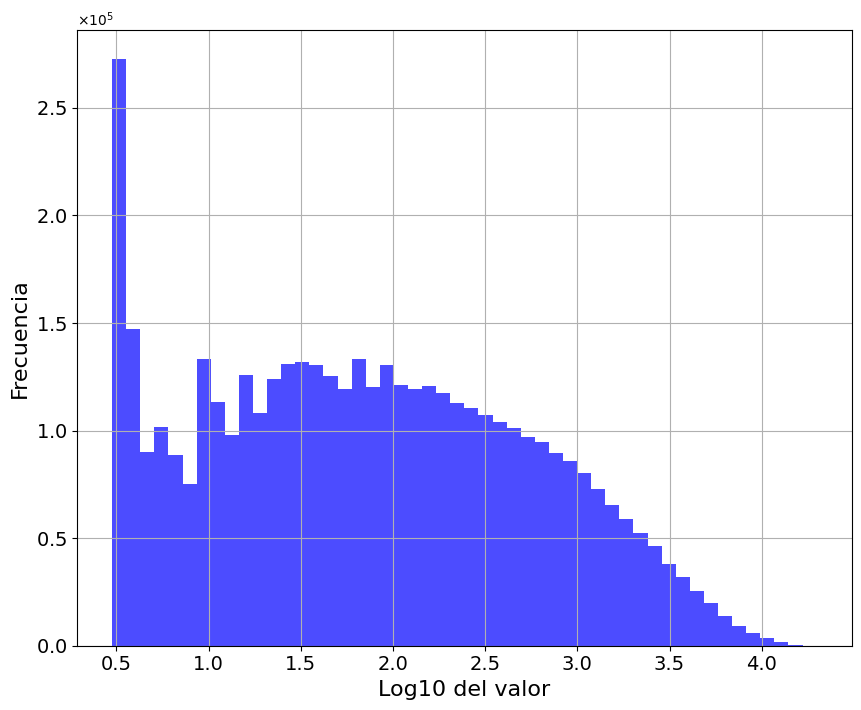

In [11]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter

def visualize_all_subjects_histogram(mat_file_path, exclude_zeros=True, apply_log_values=False, apply_log_freq=False):
    # Load the .mat file
    data = scipy.io.loadmat(mat_file_path)

    # Extract the 'scs' matrix
    scs_matrix = data['scs']

    # Initialize a list to store all values from all subjects
    all_values = []

    # Iterate over all subjects
    num_subjects = scs_matrix.shape[2]
    for subject_index in range(num_subjects):
        # Get the corresponding 'scs' matrix for the subject
        subject_scs = scs_matrix[:, :, subject_index]

        # Convert the upper triangular matrix to a full symmetric matrix
        symmetric_scs = subject_scs + subject_scs.T - np.diag(np.diag(subject_scs))

        # Flatten the symmetric matrix and add the values to the list
        all_values.extend(symmetric_scs.flatten())

    # Convert the list to a numpy array for processing
    all_values = np.array(all_values)

    # Exclude zeros if specified
    if exclude_zeros:
        all_values = all_values[all_values != 0]

    # Apply logarithm to values if specified
    if apply_log_values:
        # To avoid taking the log of zero or negative numbers, we filter out non-positive values
        all_values = all_values[all_values > 0]
        all_values = np.log10(all_values)

    # Plotting histogram
    plt.figure(figsize=(10, 8))
    
    # Calculate histogram
    counts, bins, patches = plt.hist(all_values, bins=50, color='blue', alpha=0.7)

    # Apply logarithm to frequencies if specified
    if apply_log_freq:
        # Logarithmic transformation of the frequencies
        counts = np.log10(counts + 1)  # Adding 1 to avoid log(0)
        plt.clf()  # Clear the current figure to plot the transformed histogram
        plt.bar(bins[:-1], counts, width=np.diff(bins), color='blue', alpha=0.7)

    # Set title and labels with bigger fontsize
    # plt.title("Histograma de todos los valores de matrices estructurales de todos los sujetos", fontsize=18)
    plt.xlabel("Log10 del valor" if apply_log_values else "Valor", fontsize=16)
    plt.ylabel("Log10 de la frecuencia" if apply_log_freq else "Frecuencia", fontsize=16)
    
    # Set y-axis to scientific notation
    plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    plt.gca().ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    # Set fontsize for tick labels
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.grid()
    plt.show()

# Usage example
mat_file_path = '/home/personal/Documents/2023_2/tesis/GNN-BAA/data_processing/data/original_data/scs_desikan.mat'  # Replace with the path to your .mat file
visualize_all_subjects_histogram(mat_file_path, exclude_zeros=True, apply_log_values=True, apply_log_freq=False)



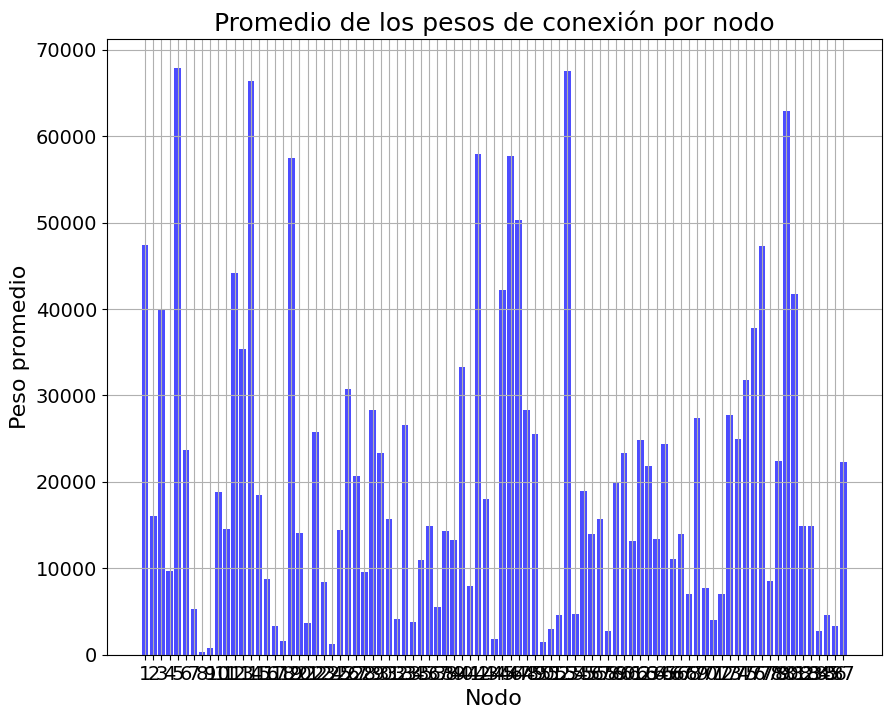

In [2]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

def visualize_average_node_weights(mat_file_path, exclude_zeros=True):
    # Load the .mat file
    data = scipy.io.loadmat(mat_file_path)

    # Extract the 'scs' matrix
    scs_matrix = data['scs']

    # Get the number of nodes and subjects
    num_nodes = scs_matrix.shape[0]
    num_subjects = scs_matrix.shape[2]

    # Initialize a numpy array to store the sum of weights for each node across subjects
    node_weights_sum = np.zeros(num_nodes)

    # Iterate over all subjects
    for subject_index in range(num_subjects):
        # Get the corresponding 'scs' matrix for the subject
        subject_scs = scs_matrix[:, :, subject_index]

        # Convert the upper triangular matrix to a full symmetric matrix
        symmetric_scs = subject_scs + subject_scs.T - np.diag(np.diag(subject_scs))

        # For each node, sum its connection weights
        for node_index in range(num_nodes):
            node_weights = symmetric_scs[node_index, :]
            
            # Optionally exclude zeros if specified
            if exclude_zeros:
                node_weights = node_weights[node_weights != 0]
            
            # Sum the weights of the node
            node_weights_sum[node_index] += np.sum(node_weights)

    # Compute the average weight for each node
    average_node_weights = node_weights_sum / num_subjects

    # Plotting the average node weights
    plt.figure(figsize=(10, 8))
    plt.bar(np.arange(1, num_nodes + 1), average_node_weights, color='blue', alpha=0.7)

    # Set title and labels with bigger fontsize
    plt.title("Promedio de los pesos de conexión por nodo", fontsize=18)
    plt.xlabel("Nodo", fontsize=16)
    plt.ylabel("Peso promedio", fontsize=16)

    # Set fontsize for tick labels
    plt.xticks(np.arange(1, num_nodes + 1), fontsize=14)
    plt.yticks(fontsize=14)

    plt.grid()
    plt.show()

# Usage example
mat_file_path = '/home/personal/Documents/2023_2/tesis/GNN-BAA/data_processing/data/original_data/scs_desikan.mat'  # Replace with the path to your .mat file
visualize_average_node_weights(mat_file_path, exclude_zeros=True)


# The fc feature matrices

In [30]:
import matplotlib.pyplot as plt
import numpy as np

def plot_time_series_matrix_with_histogram(folder_path, subject_id, FROM, title):
    file_path = f'{folder_path}/fc_{subject_id}_corr.npy'
    fc_data = np.load(file_path)[FROM:, FROM:]
    # fc_data = np.where(fc_data<0, 0, fc_data)
    
    # fig, axs = plt.subplots(1, 2, figsize=(16, 7))
    
    # Plot the FC matrix
    im = axs[0].imshow(fc_data, cmap='viridis', aspect='auto')
    plt.colorbar(im, ax=axs[0])
    axs[0].set_title(f"{title} del sujeto {subject_id}")
    axs[0].set_xlabel('Región')
    axs[0].set_ylabel('Región')
    
    # Plot the histogram
    axs[1].hist(fc_data.ravel(), bins=50, color='blue', alpha=0.7)
    axs[1].set_title(f"Histograma de valores funcionales del sujeto {subject_id}")
    axs[1].set_xlabel('Valores de conectividad funcional')
    axs[1].set_ylabel('Frecuencia')
    
    plt.tight_layout()
    plt.show()
    
    return fc_data


In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_time_series_matrix_with_histogram(folder_path, subject_id, FROM, title):
    file_path = f'{folder_path}/fc_{subject_id}_corr.npy'
    fc_data = np.load(file_path)[FROM:, FROM:]
    fc_data = np.where(fc_data<0.2, 0, fc_data)
    
    # fig, axs = plt.subplots(1, 2, figsize=(16, 7))
    
    # Plot the FC matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(fc_data, cmap='viridis')
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=12)
    # plt.title(f"Matriz estructural para el sujeto {subject_id}")
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.show()
    
    return fc_data



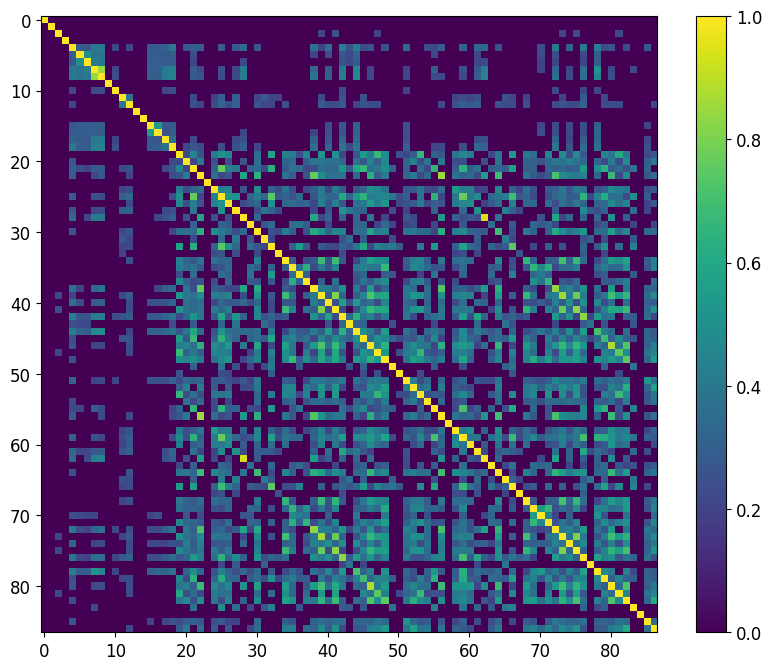

In [6]:
folder_path = f'/home/personal/Documents/2023_2/tesis/GNN-BAA/data_processing/data/87_nodes_downloaded_on_imerl/corr_matrices/{100206}'  # Replace with the path to your time_series folder
fc_us = plot_time_series_matrix_with_histogram(folder_path, subject_id=100206, FROM=0, title = 'Matriz funcional')

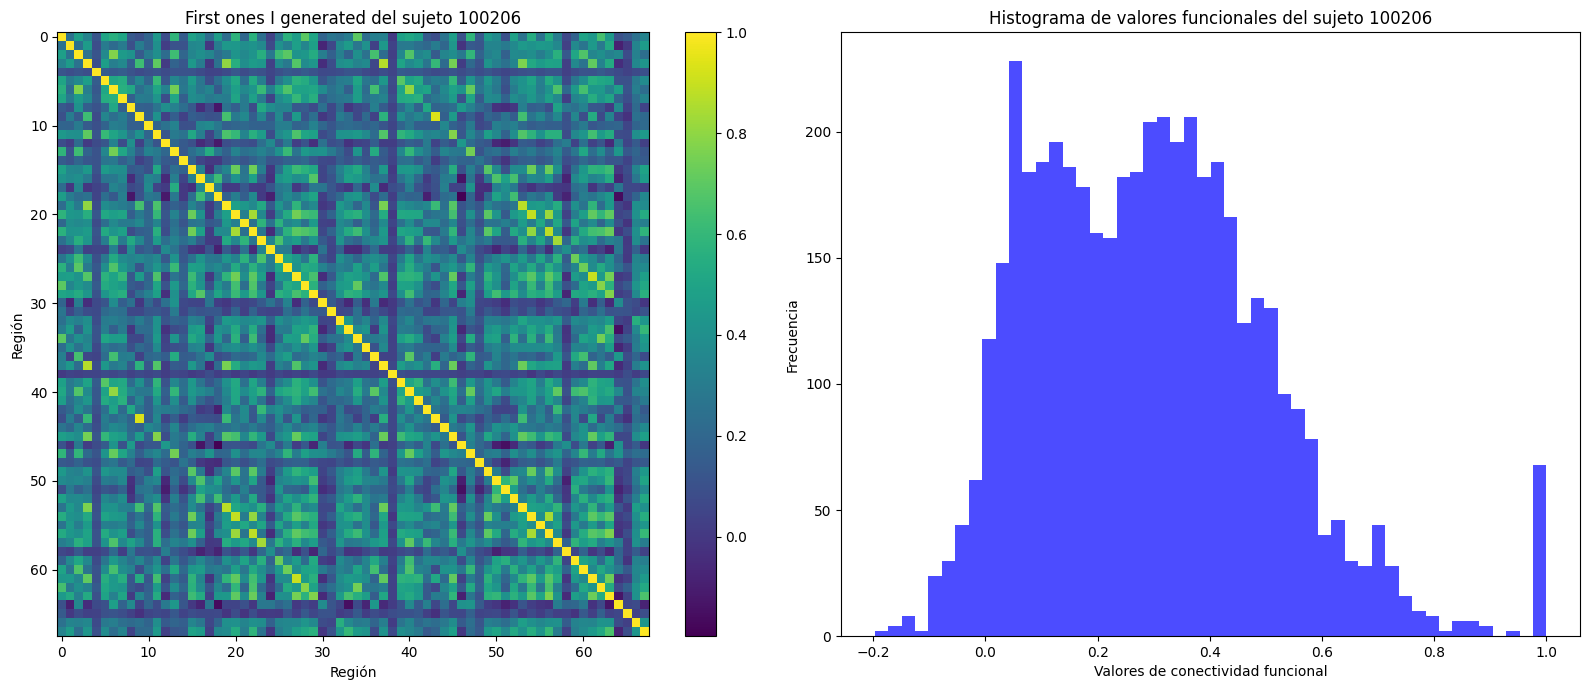

In [17]:
folder_path = f'/home/personal/Documents/2023_2/tesis/GNN-BAA/data_processing/data/corr_matrices/{100206}'  # Replace with the path to your time_series folder
fc_us = plot_time_series_matrix_with_histogram(folder_path, subject_id=100206, FROM=0, title = 'First ones I generated')

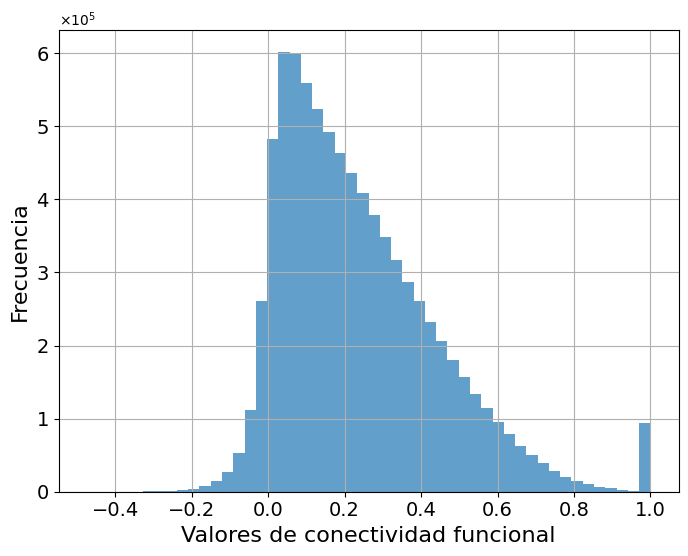

In [12]:
def plot_overall_histogram_from_folders(folder_path):
    all_values = []
    
    # Walk through the folder and its subfolders to find .npy files
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('_corr.npy'):
                file_path = os.path.join(root, file)
                data = np.load(file_path)
                all_values.extend(data.ravel())
    
    plt.figure(figsize=(8, 6))
    plt.hist(all_values, bins=50, alpha=0.7)
    # plt.title("Histograma de los valores de conectividad funcional de todos los sujetos")
    plt.xlabel('Valores de conectividad funcional', fontsize=16)
    plt.ylabel('Frecuencia', fontsize=16)

    # Set y-axis to scientific notation
    plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    plt.gca().ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    # Set fontsize for tick labels
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.grid()
    
    plt.show()
    
folder_path = f'/home/personal/Documents/2023_2/tesis/GNN-BAA/data_processing/data/87_nodes_downloaded_on_imerl/corr_matrices/'
plot_overall_histogram_from_folders(folder_path)

### Old

In [ ]:
def plot_time_series_matrix_with_threshold(folder_path, subject_id, threshold=0.75):
    file_path = f'{folder_path}/fc_{subject_id}.npy'
    
    # Load the NumPy file
    data = np.load(file_path)

    # Apply threshold
    data_thresholded = np.where(np.abs(data) > threshold, data, 0)

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.imshow(data_thresholded, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title(f"Thresholded Time Series Matrix for Subject {subject_id}")
    plt.xlabel('Time Points')
    plt.ylabel('Features/Regions')
    plt.show()
    
plot_time_series_matrix_with_threshold(folder_path, subject_id, threshold = 0.9)


In [ ]:
def plot_time_series_matrix_with_custom_threshold(folder_path, subject_id, threshold=0.75):
    file_path = f'{folder_path}/fc_{subject_id}.npy'
    
    # Load the NumPy file
    data = np.load(file_path)

    # Apply threshold
    data_thresholded = np.where(np.abs(data) > threshold, data, 0)

    # Define the colormap normalization
    # Normalizing from threshold to 1 and -threshold to -1
    norm = plt.Normalize(-1 if data.min() < -threshold else -threshold, 
                         1 if data.max() > threshold else threshold)

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.imshow(data_thresholded, cmap='viridis', norm=norm, aspect='auto')
    plt.colorbar()
    plt.title(f"Thresholded Time Series Matrix for Subject {subject_id}")
    plt.xlabel('Time Points')
    plt.ylabel('Features/Regions')
    plt.show()
    
plot_time_series_matrix_with_custom_threshold(folder_path, subject_id)


# Task fc

In [3]:

def plot_time_series_matrix_with_histogram(folder_path, subject_id, FROM, title, task):
    file_path = f'{folder_path}/fc_{subject_id}_corr_{task}.npy'
    fc_data = np.load(file_path)[FROM:, FROM:]
    
    fig, axs = plt.subplots(1, 2, figsize=(16, 7))
    
    # Plot the FC matrix
    im = axs[0].imshow(fc_data, cmap='viridis', aspect='auto')
    plt.colorbar(im, ax=axs[0])
    axs[0].set_title(f"{title} para el sujeto  {subject_id}")
    axs[0].set_xlabel('Region')
    axs[0].set_ylabel('Region')
    
    # Plot the histogram
    axs[1].hist(fc_data.ravel(), bins=50, color='blue', alpha=0.7)
    axs[1].set_title(f"Histograma de conectividad para el sujeto {subject_id}")
    axs[1].set_xlabel('FC Value')
    axs[1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    return fc_data


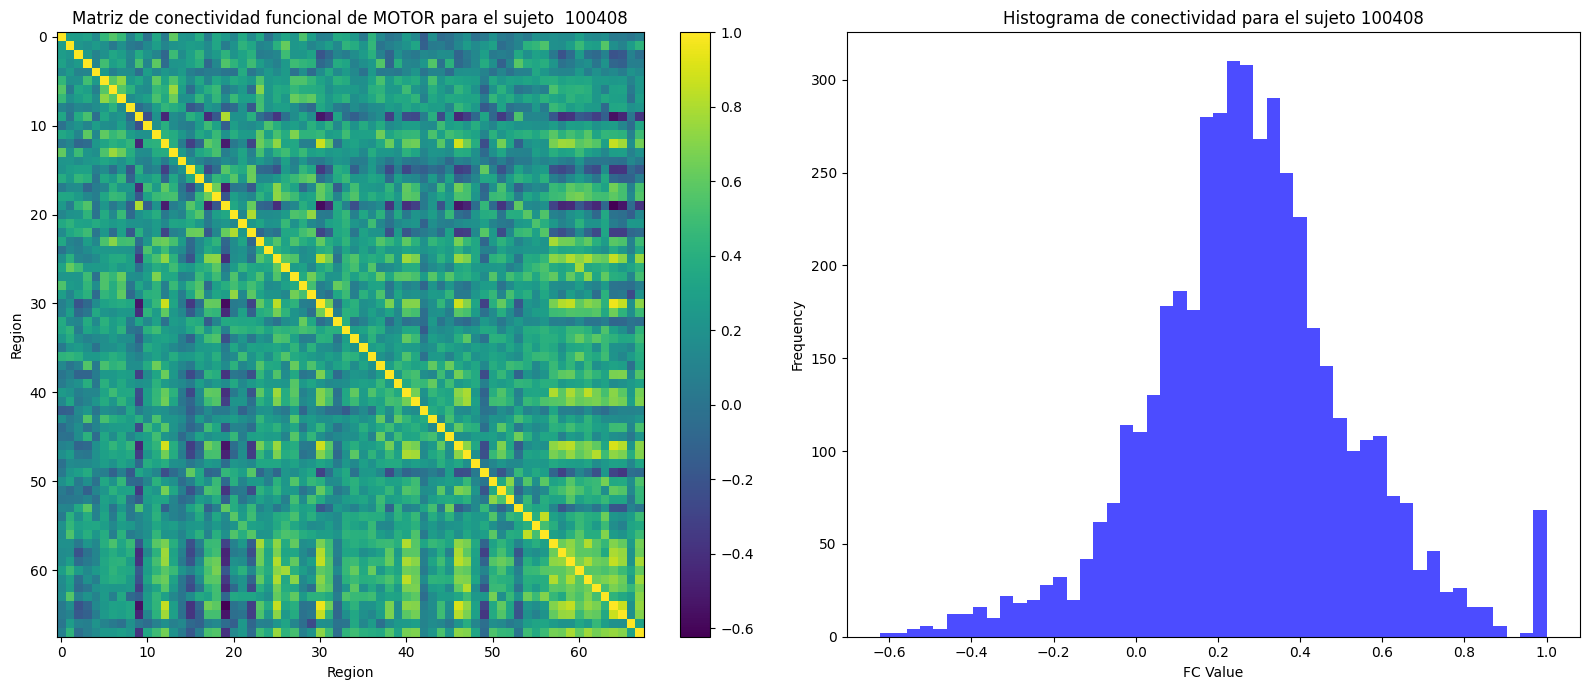

In [16]:
subject_id=100408
task = 'MOTOR'
folder_path = f'/home/personal/Documents/2023_2/tesis/GNN-BAA/data_processing/data_desikan_task/corr_matrices/{subject_id}'  # Replace with the path to your time_series folder
fc_us = plot_time_series_matrix_with_histogram(folder_path, subject_id=subject_id, FROM=19, title = f'Matriz de conectividad funcional de {task}', task = task)

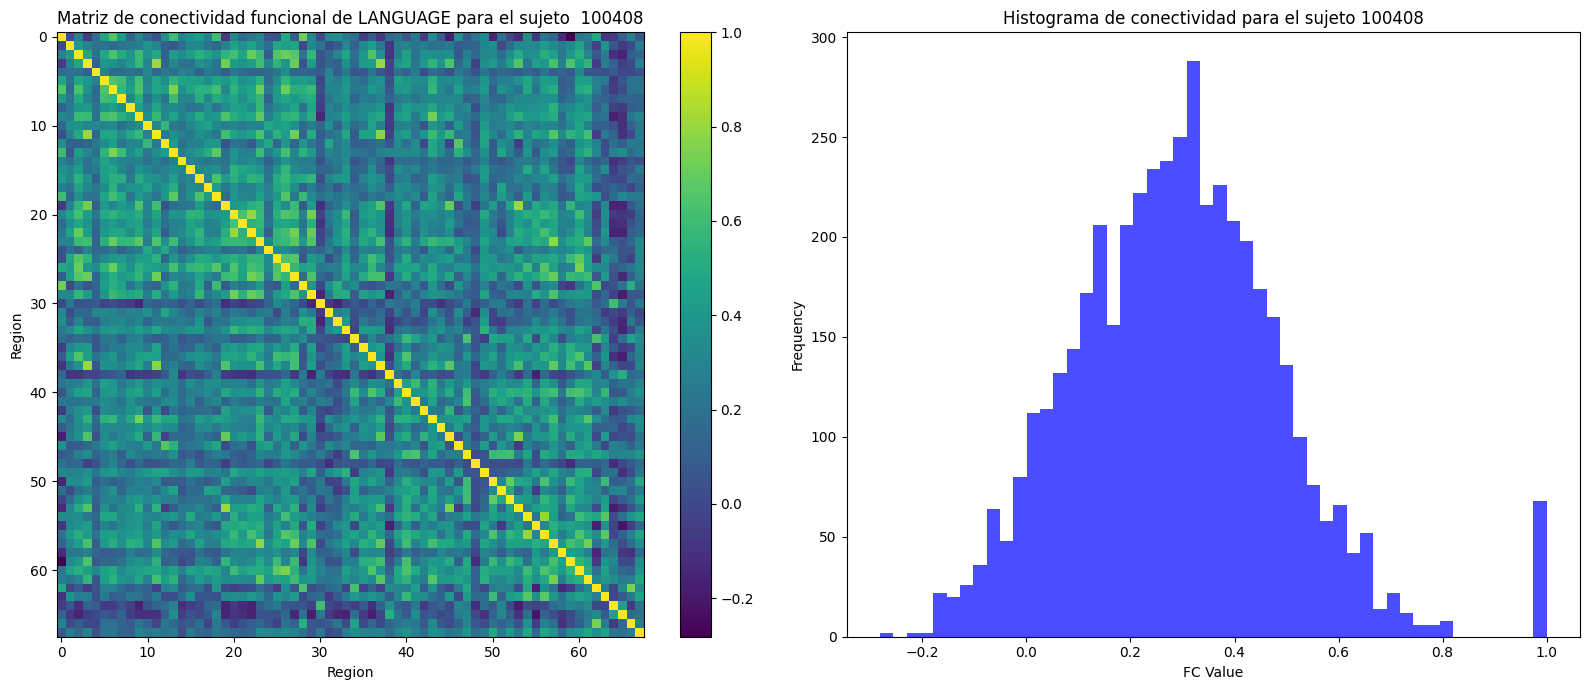

In [17]:
task = 'LANGUAGE'
folder_path = f'/home/personal/Documents/2023_2/tesis/GNN-BAA/data_processing/data_desikan_task/corr_matrices/{subject_id}'  # Replace with the path to your time_series folder
fc_us = plot_time_series_matrix_with_histogram(folder_path, subject_id=subject_id, FROM=19, title = f'Matriz de conectividad funcional de {task}', task = task)

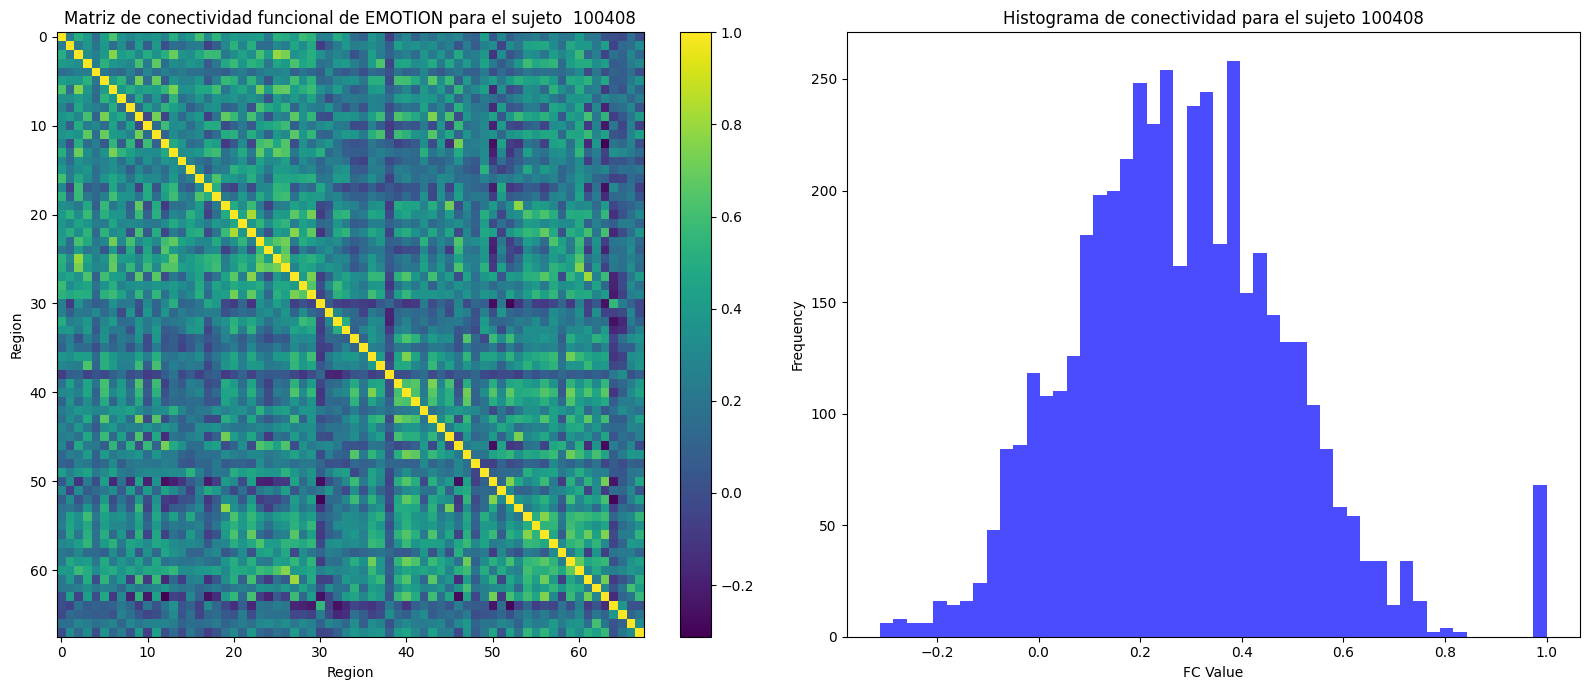

In [18]:
task = 'EMOTION'
folder_path = f'/home/personal/Documents/2023_2/tesis/GNN-BAA/data_processing/data_desikan_task/corr_matrices/{subject_id}'  # Replace with the path to your time_series folder
fc_us = plot_time_series_matrix_with_histogram(folder_path, subject_id=subject_id, FROM=19, title = f'Matriz de conectividad funcional de {task}', task = task)

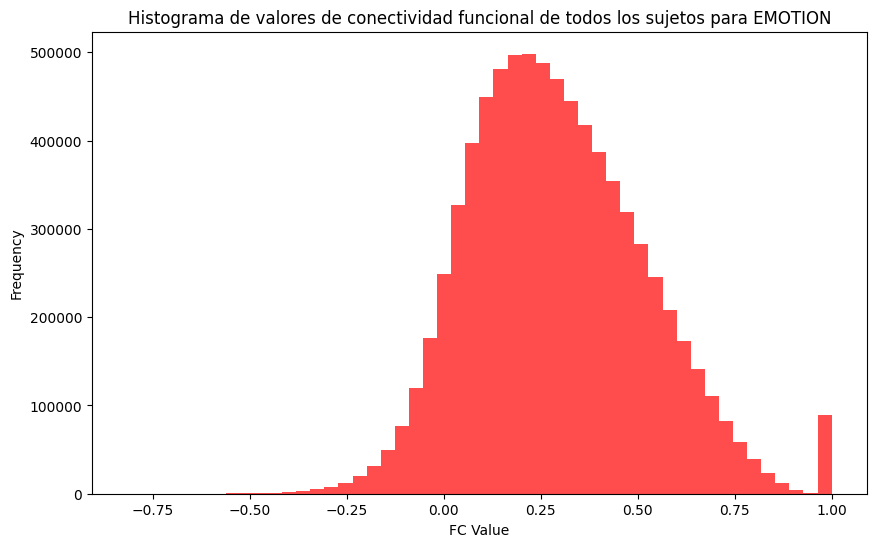

In [45]:
def plot_overall_histogram_from_folders(folder_path, task):
    all_values = []
    
    # Walk through the folder and its subfolders to find .npy files
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(f'_corr_{task}.npy'):
                file_path = os.path.join(root, file)
                data = np.load(file_path)
                all_values.extend(data.ravel())
    
    plt.figure(figsize=(10, 6))
    plt.hist(all_values, bins=50, color='red', alpha=0.7)
    plt.title(f"Histograma de valores de conectividad funcional de todos los sujetos para {task}")
    plt.xlabel('FC Value')
    plt.ylabel('Frequency')
    plt.show()

folder_path = f'/home/personal/Documents/2023_2/tesis/GNN-BAA/data_processing/data_desikan_task/corr_matrices/'
plot_overall_histogram_from_folders(folder_path, task)

# The fc matrices


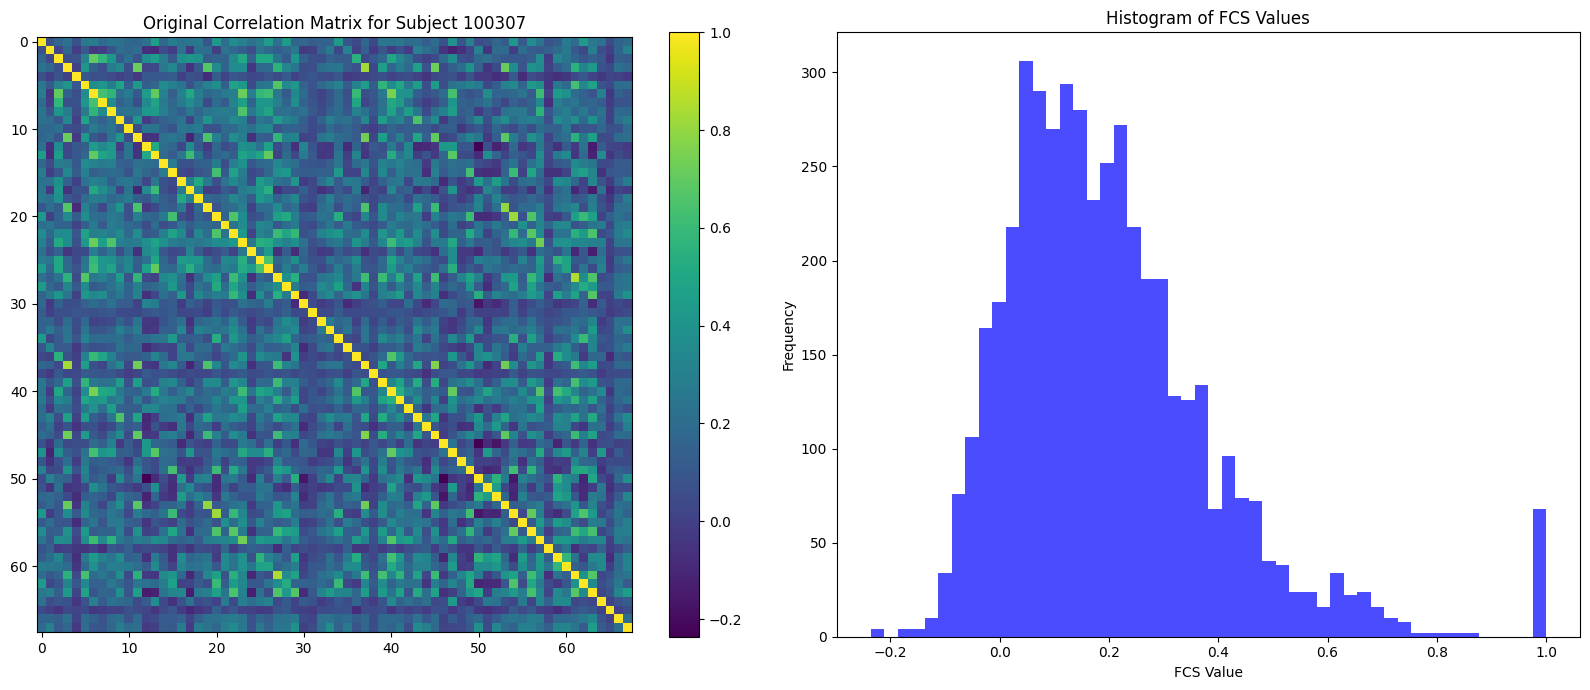

In [35]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

def visualize_subject_fcs_by_id(mat_file_path, subject_id):
    # Load the .mat file
    data = scipy.io.loadmat(mat_file_path)
    
    # Extract the subject list and 'fcs' matrix
    subject_list = data['subject_list']
    fcs_matrix = data['fcs']
    
    subject_index = None
    # Find the index for the given subject_id
    for i, subj in enumerate(subject_list):
        if f'{subj[0]}' == subject_id:
            subject_index = i
            break
    
    if subject_index is None:
        print(f"Subject ID {subject_id} not found.")
        return
    
    # Extract the 'fcs' matrix for the specific subject
    subject_fcs = fcs_matrix[:68, :68, subject_index]
    
    # Plotting both the FCS matrix and its histogram
    fig, axs = plt.subplots(1, 2, figsize=(16, 7))
    
    # FCS matrix plot
    im = axs[0].imshow(subject_fcs, cmap='viridis')
    fig.colorbar(im, ax=axs[0])
    axs[0].set_title(f"Original Correlation Matrix for Subject {subject_id}")
    
    # Histogram of the FCS matrix values
    axs[1].hist(subject_fcs.ravel(), bins=50, color='blue', alpha=0.7)
    axs[1].set_title("Histogram of FCS Values")
    axs[1].set_xlabel('FCS Value')
    axs[1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    return subject_fcs

# Ensure to define or replace `subject_id` with the specific subject ID you're interested in.
# subject_id = '100206'
# Call the function with the specified mat_file_path and subject_id
mat_file_path = '/home/personal/Documents/2023_2/tesis/GNN-BAA/data_processing/data/original_data/correlations_desikan_old.mat'  # Replace with the path to your .mat file
fcs_original = visualize_subject_fcs_by_id(mat_file_path, subject_id)


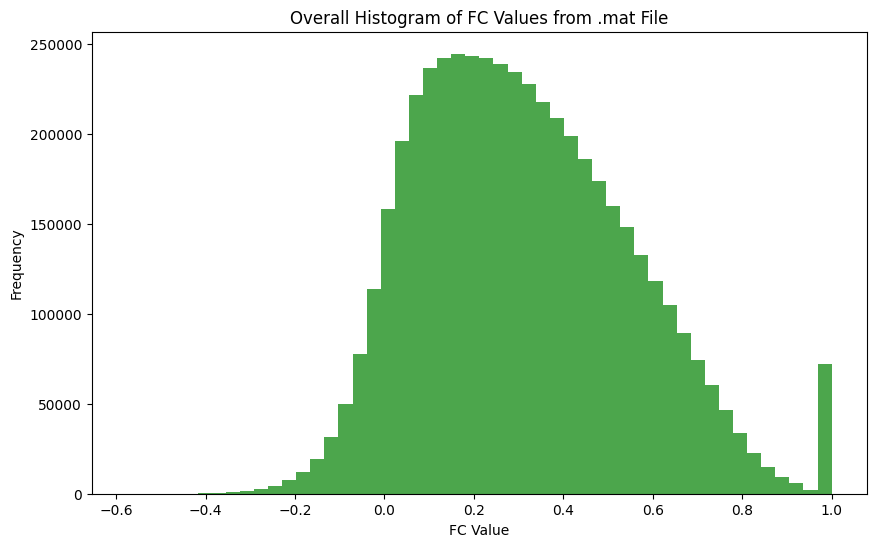

In [6]:
import scipy.io

def plot_overall_histogram_from_mat(mat_file_path):
    data = scipy.io.loadmat(mat_file_path)
    fcs_matrix = data['fcs'][:68, :68, :]
    
    # Collect all values from the fcs_matrix
    all_values = fcs_matrix.ravel()
    
    plt.figure(figsize=(10, 6))
    plt.hist(all_values, bins=50, color='green', alpha=0.7)
    plt.title("Overall Histogram of FC Values from .mat File")
    plt.xlabel('FC Value')
    plt.ylabel('Frequency')
    plt.show()

plot_overall_histogram_from_mat(mat_file_path)

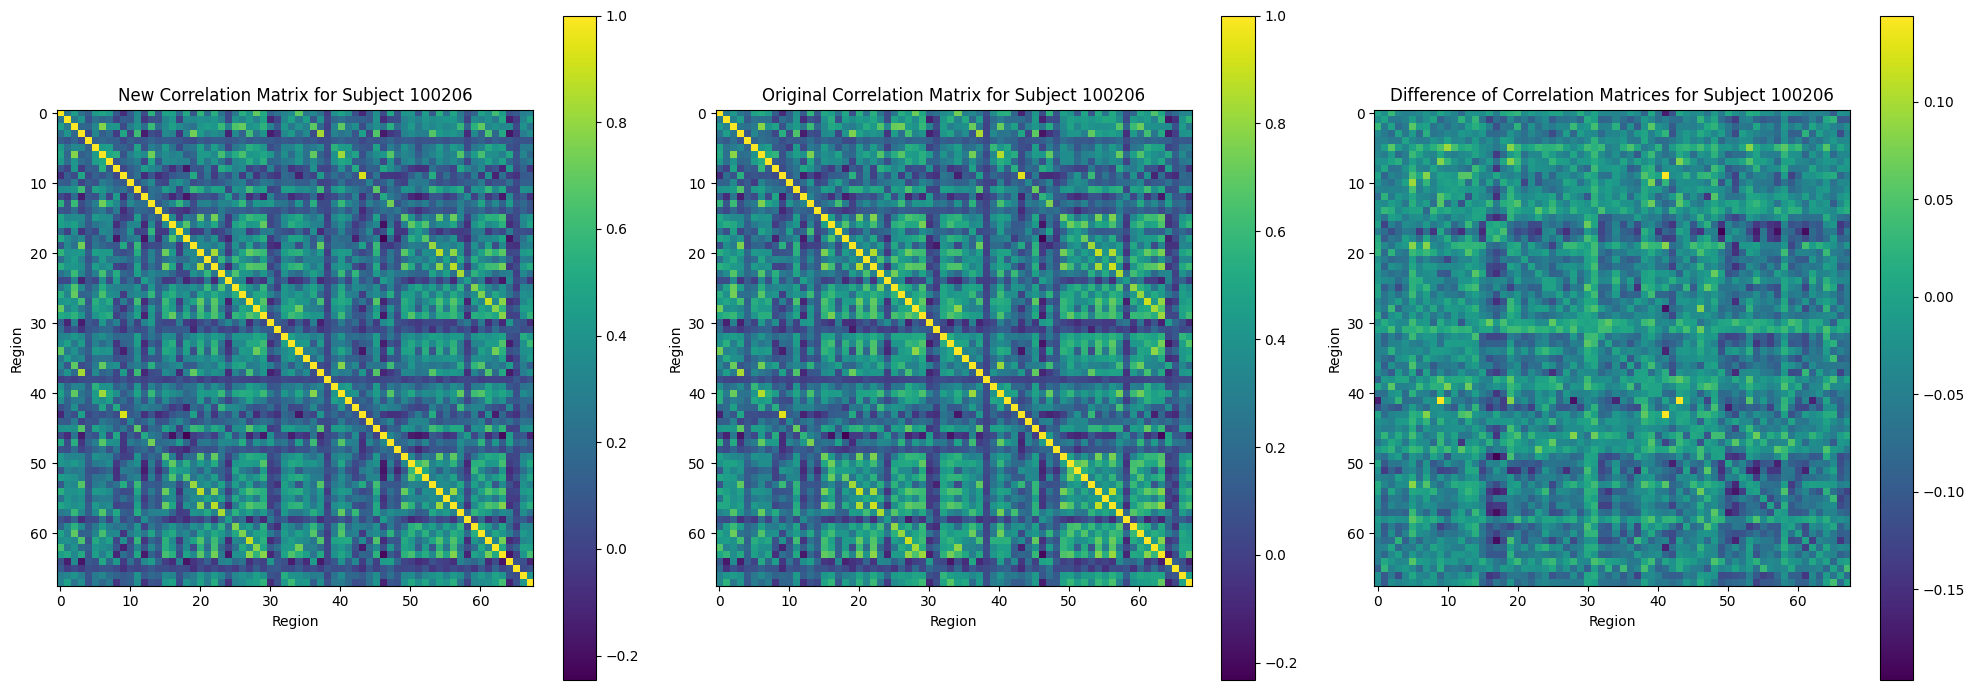

In [16]:
fc_diff = fc_us - fcs_original

fig, axs = plt.subplots(1, 3, figsize=(20, 7))
    
# Plot the FC matrix
im = axs[0].imshow(fc_us)
plt.colorbar(im, ax=axs[0])
axs[0].set_title(f"New Correlation Matrix for Subject {subject_id}")
axs[0].set_xlabel('Region')
axs[0].set_ylabel('Region')

im = axs[1].imshow(fcs_original)
plt.colorbar(im, ax=axs[1])
axs[1].set_title(f"Original Correlation Matrix for Subject {subject_id}")
axs[1].set_xlabel('Region')
axs[1].set_ylabel('Region')

im = axs[2].imshow(fc_diff)
plt.colorbar(im, ax=axs[2])
axs[2].set_title(f"Difference of Correlation Matrices for Subject {subject_id}")
axs[2].set_xlabel('Region')
axs[2].set_ylabel('Region')

plt.tight_layout()
plt.show()
    

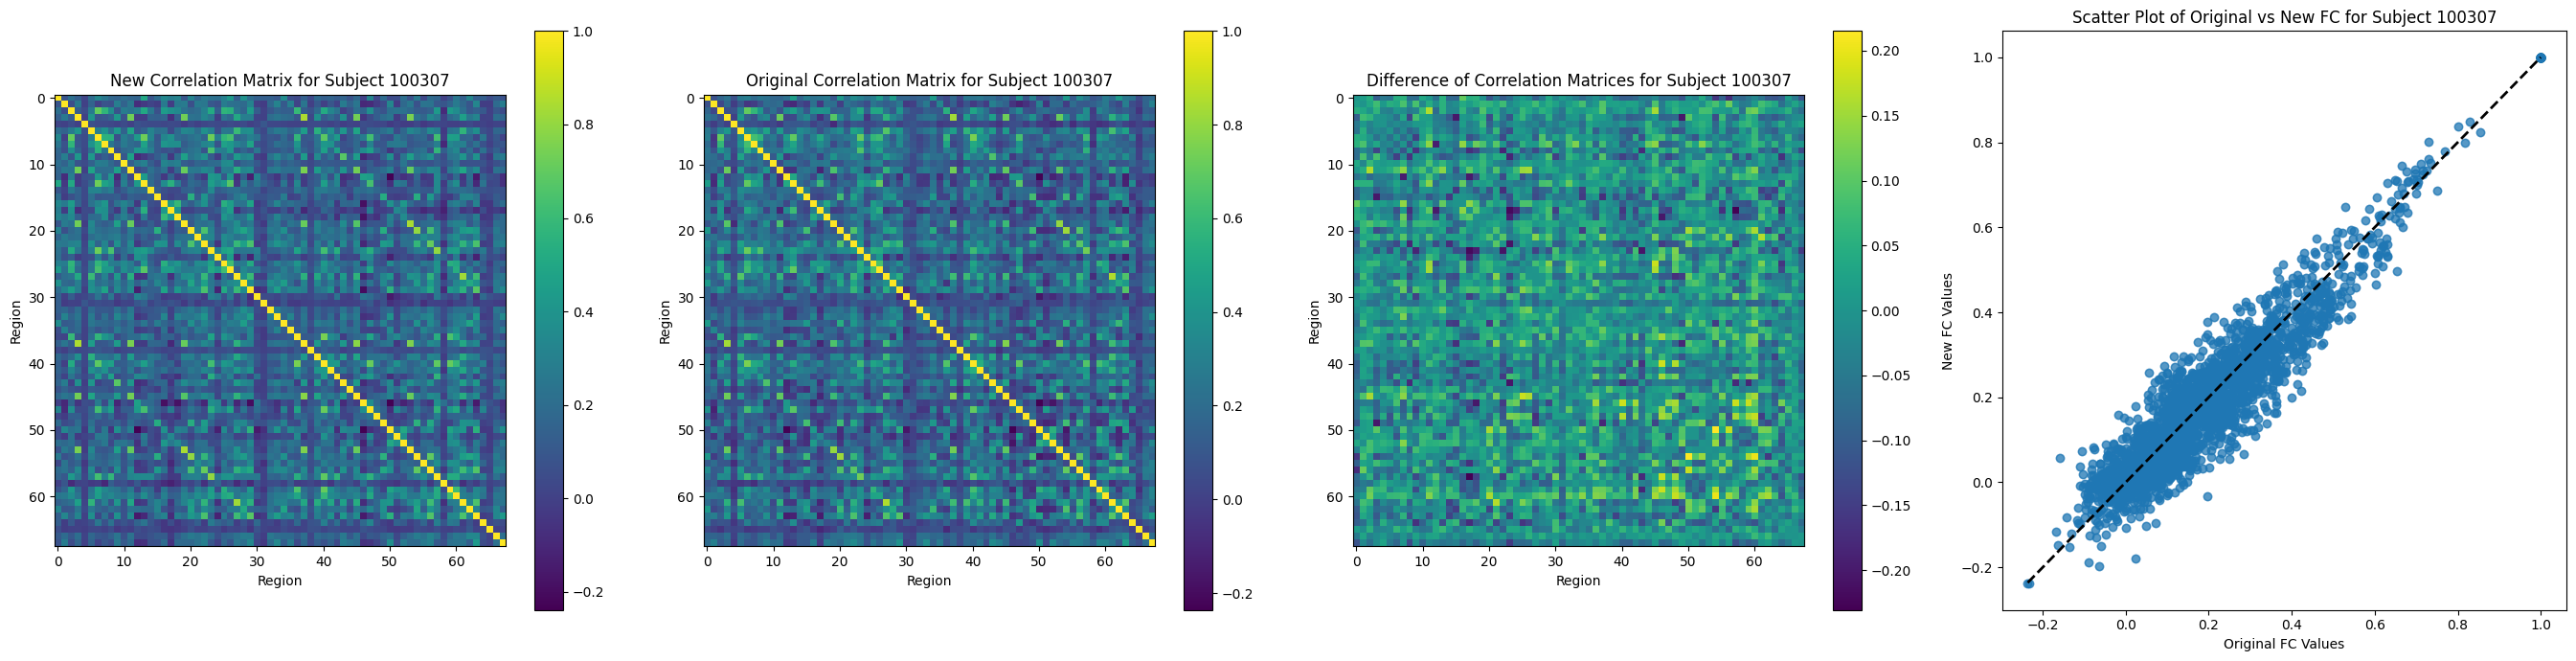

In [36]:
# Assuming fc_us, fcs_original, and subject_id are defined
fc_diff = fc_us - fcs_original

fig, axs = plt.subplots(1, 4, figsize=(27, 7))  # Adjusted for an additional subplot
    
# Plot the FC matrix
im = axs[0].imshow(fc_us)
plt.colorbar(im, ax=axs[0])
axs[0].set_title(f"New Correlation Matrix for Subject {subject_id}")
axs[0].set_xlabel('Region')
axs[0].set_ylabel('Region')

im = axs[1].imshow(fcs_original)
plt.colorbar(im, ax=axs[1])
axs[1].set_title(f"Original Correlation Matrix for Subject {subject_id}")
axs[1].set_xlabel('Region')
axs[1].set_ylabel('Region')

im = axs[2].imshow(fc_diff)
plt.colorbar(im, ax=axs[2])
axs[2].set_title(f"Difference of Correlation Matrices for Subject {subject_id}")
axs[2].set_xlabel('Region')
axs[2].set_ylabel('Region')

# Flatten the matrices for scatter plot comparison
fc_us_flattened = fc_us.flatten()
fcs_original_flattened = fcs_original.flatten()

# Scatter plot of fc_us vs fcs_original
axs[3].scatter(fcs_original_flattened, fc_us_flattened, alpha=0.5)
axs[3].set_title(f"Scatter Plot of Original vs New FC for Subject {subject_id}")
axs[3].set_xlabel('Original FC Values')
axs[3].set_ylabel('New FC Values')
axs[3].plot([fcs_original_flattened.min(), fcs_original_flattened.max()], 
            [fcs_original_flattened.min(), fcs_original_flattened.max()], 
            'k--', lw=2)  # Adds a reference line for perfect correlation

plt.tight_layout()
plt.show()

In [13]:
def time_series_diff(python_timeseries_file, matlab_timeseries_file, subject_id):
    # Load the .mat file
    pyth_data = scipy.io.loadmat(python_timeseries_file)
    mat_data = scipy.io.loadmat(matlab_timeseries_file)

    # Extract the subject list and 'ts' matrix
    ts_pyth_matrix = pyth_data['dtseries'][:, :]
    ts_matlab_matrix = mat_data['dtseries'][19:, :]
    
    diff = np.sum((ts_pyth_matrix - ts_matlab_matrix)**2, axis = 1)
    
    print(diff)

    # # Plotting
    # plt.figure(figsize=(20, 10))
    # plt.imshow(diff, cmap='viridis')
    # plt.colorbar()
    # plt.title(f"Time Series difference vector for Subject {subject_id}")
    # plt.show()


# Usage example
python_timeseries_file = '/home/personal/Documents/2023_2/tesis/data_processing/data_aux/time_series/100206/timeseries_REST2_RL.mat'  
matlab_timeseries_file = '/home/personal/Documents/2023_2/tesis/data_processing/data_REST2/time_series/100206/timeseries_REST2_RL.mat'
# matlab_timeseries_file = '/home/personal/Documents/2023_2/tesis/data_processing/data_trial/68/time_series/100206/timeseries_REST2_RL.mat'

subject_id = '100206'
time_series_diff(python_timeseries_file, matlab_timeseries_file, subject_id)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
